#Corn Disease Using Convolutional Neural Network (CNN)

In this project, We will use Convolutional Neural Network (CNN) to classify Corn diseases. The dataset contains  leaf images  of four categories: Corn_Common_Rust, Corn_Gray_Leaf_Spot, Corn_Healthy, Corn___Northern_Leaf_Blight. The dataset is downloaded from Kaggle.

At the end of the first part of the lesson,each student will be abble to:
1. Read multiple images in a folder
2. Understand tensorflow and keras
3. Use the matplotlib library to plot images
4. Do data preprocessing

#Importing Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Connect with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

##Training Image Preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/capstone/dataset-fix/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1382 files belonging to 4 classes.


## Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/capstone/dataset-fix/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 384 files belonging to 4 classes.


##To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

#Building Model

In [25]:
cnn = tf.keras.models.Sequential()


##Building Convolution Layer

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [32]:
cnn.add(tf.keras.layers.Flatten())


In [33]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [34]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


In [35]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

##Compiling and Training Phase

In [36]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [38]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
44/44 [==============================] - 291s 6s/step - loss: 1.3141 - accuracy: 0.4573 - val_loss: 0.7594 - val_accuracy: 0.6354
Epoch 2/10
44/44 [==============================] - 220s 5s/step - loss: 0.6230 - accuracy: 0.7185 - val_loss: 0.3011 - val_accuracy: 0.8750
Epoch 3/10
44/44 [==============================] - 225s 5s/step - loss: 0.4170 - accuracy: 0.8046 - val_loss: 0.2689 - val_accuracy: 0.8828
Epoch 4/10
44/44 [==============================] - 223s 5s/step - loss: 0.3482 - accuracy: 0.8408 - val_loss: 0.2706 - val_accuracy: 0.9062
Epoch 5/10
44/44 [==============================] - 218s 5s/step - loss: 0.2722 - accuracy: 0.8784 - val_loss: 0.2627 - val_accuracy: 0.9115
Epoch 6/10
44/44 [==============================] - 221s 5s/step - loss: 0.4125 - accuracy: 0.8329 - val_loss: 0.2934 - val_accuracy: 0.8828
Epoch 7/10
44/44 [==============================] - 219s 5s/step - loss: 0.2249 - accuracy: 0.9045 - val_loss: 0.2159 - val_accuracy: 0.9193
Epoch 8/10
44

#Evaluating Model

In [39]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

44/44 [==============================] - 57s 1s/step - loss: 0.1993 - accuracy: 0.9139
Training accuracy: 0.913892924785614


In [40]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

12/12 [==============================] - 16s 1s/step - loss: 0.2414 - accuracy: 0.9167
Validation accuracy: 0.9166666865348816


#Saving Model

In [41]:
cnn.save('trained_plant_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
training_history.history #Return Dictionary of history


{'loss': [1.3140759468078613,
  0.623027503490448,
  0.4170391261577606,
  0.348235547542572,
  0.2721969783306122,
  0.41249656677246094,
  0.2248576283454895,
  0.2239307165145874,
  0.18336667120456696,
  0.15888455510139465],
 'accuracy': [0.45730826258659363,
  0.7185238599777222,
  0.8046309947967529,
  0.8408104181289673,
  0.8784370422363281,
  0.8328509330749512,
  0.9044862389564514,
  0.9088277816772461,
  0.9182344675064087,
  0.941389262676239],
 'val_loss': [0.7594465613365173,
  0.3011234402656555,
  0.26889392733573914,
  0.27055588364601135,
  0.2626659572124481,
  0.29337212443351746,
  0.21590672433376312,
  0.17976605892181396,
  0.16601991653442383,
  0.24137645959854126],
 'val_accuracy': [0.6354166865348816,
  0.875,
  0.8828125,
  0.90625,
  0.9114583134651184,
  0.8828125,
  0.9192708134651184,
  0.921875,
  0.9427083134651184,
  0.9166666865348816]}

In [43]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [44]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Accuracy Visualization

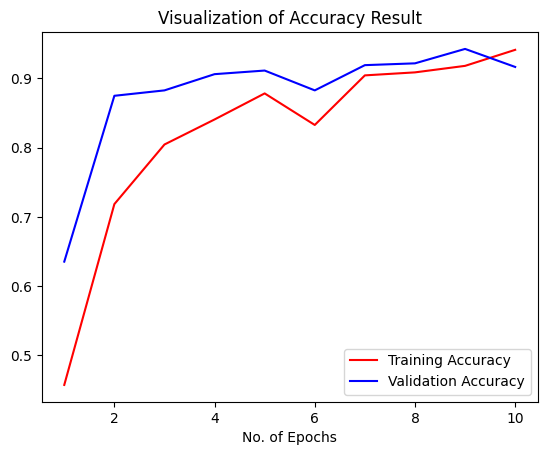

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

#Some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names


In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/capstone/dataset-fix/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 384 files belonging to 4 classes.


In [48]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

384/384 [==============================] - 22s 55ms/step


In [49]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [50]:
Y_true

<tf.Tensor: shape=(384,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [51]:
predicted_categories

<tf.Tensor: shape=(384,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [53]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                             precision    recall  f1-score   support

         Corn___Common_Rust       0.99      0.99      0.99       119
      Corn___Gray_Leaf_Spot       0.75      0.90      0.82        51
             Corn___Healthy       0.91      1.00      0.95       116
Corn___Northern_Leaf_Blight       0.95      0.73      0.83        98

                   accuracy                           0.92       384
                  macro avg       0.90      0.91      0.90       384
               weighted avg       0.92      0.92      0.91       384



#Confition Matix Vizualization

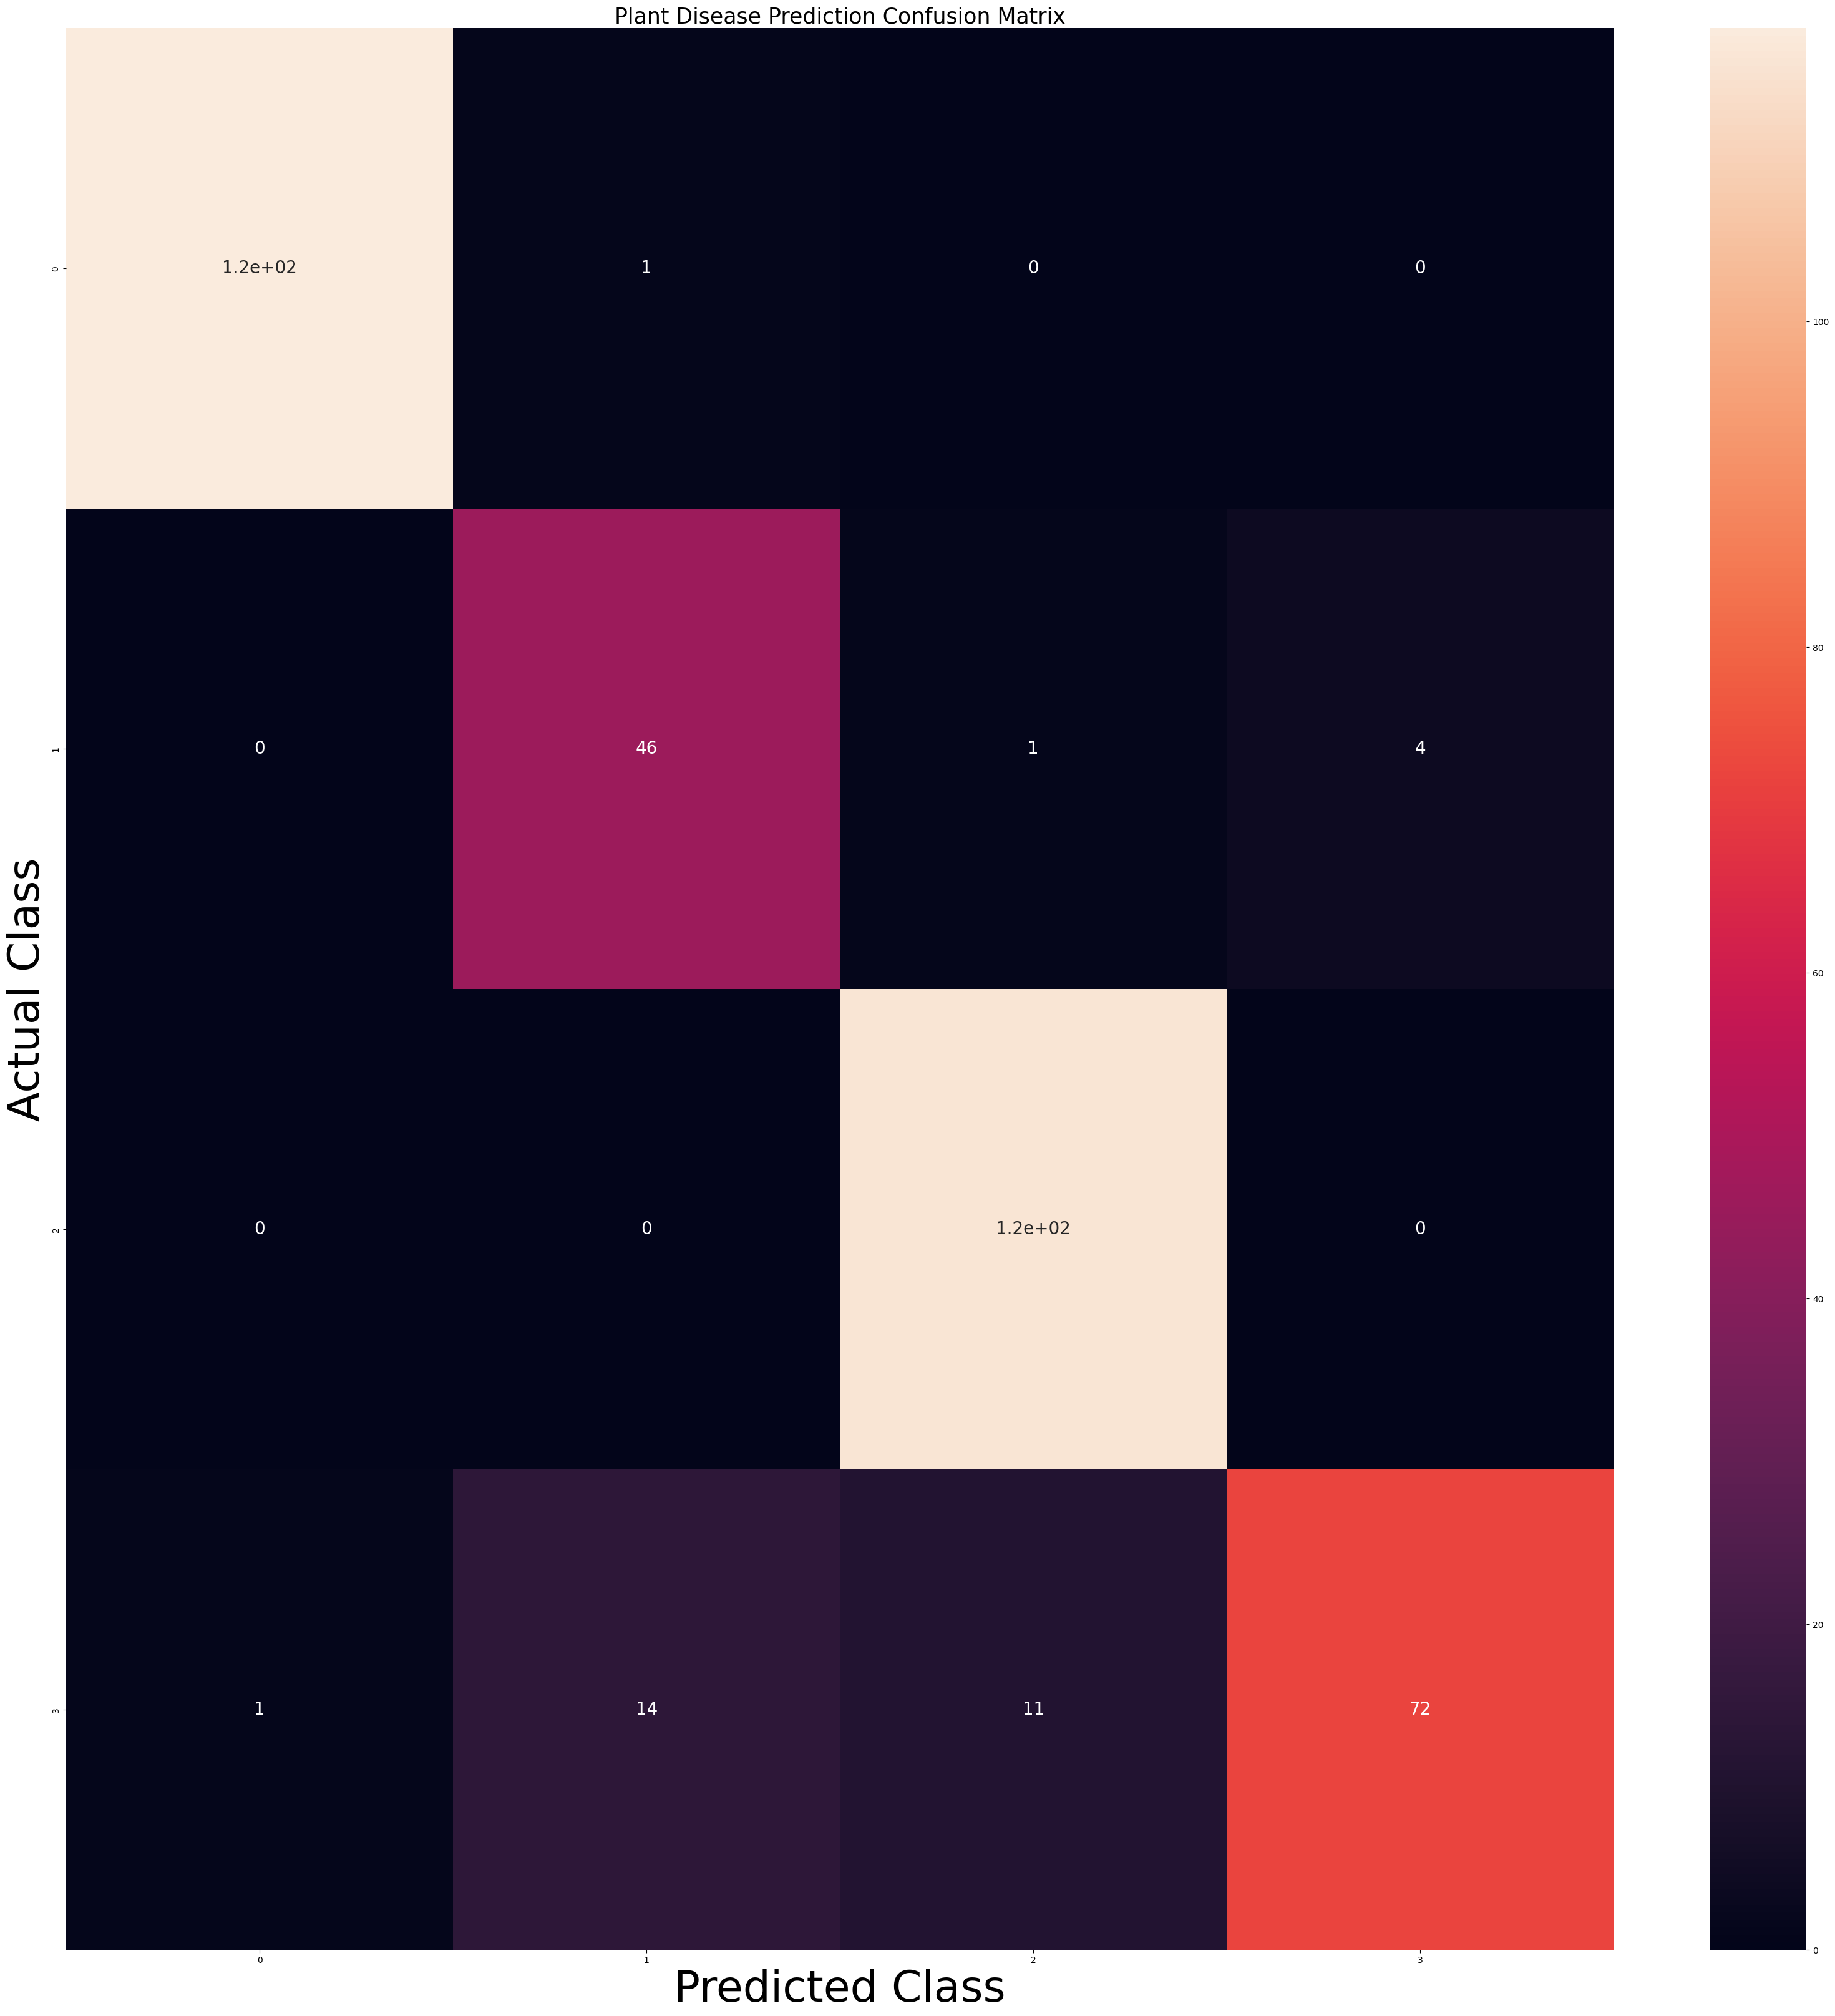

In [58]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 20})

plt.xlabel('Predicted Class',fontsize = 50)
plt.ylabel('Actual Class',fontsize = 50)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

#Test set image processing

In [266]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/capstone/dataset-fix/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 384 files belonging to 4 classes.
['Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Corn___Northern_Leaf_Blight']


#Load Model

In [60]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')


#Visualising and Performing Prediction on Single image

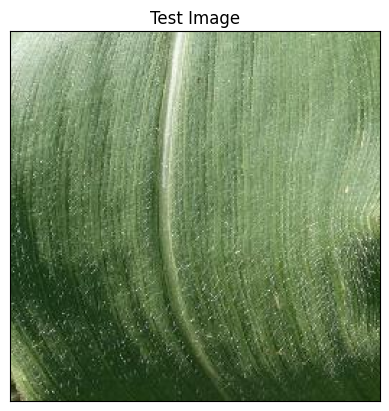

In [260]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/capstone/dataset-fix/Corn_Health (1162).jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [261]:
import numpy as np


image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 205ms/step


In [262]:
print(predictions)


[[0.00386962 0.24199255 0.73679316 0.01734469]]


In [263]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


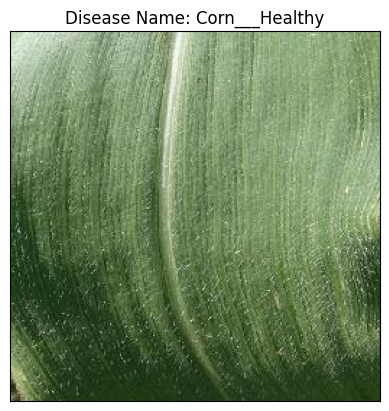

In [264]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()